In [1]:
%ls

cmd.sh@                 run_prepare_shared.log
conf@                   run_prepare_shared.sh*
data/                   run_vector_2spk_baseline.sh*
exp_vector_2spk/        run_vector_2spk_baseline.train.log
local@                  sim_rir_8k.zip@
path.sh@                steps@
plot_resemblyzer.ipynb  utils@


In [2]:
%ls data/local/LibriSpeech/test-clean

1089/  1284/  2094/  2830/  3729/  4970/  5639/  6829/  7176/  8455/
1188/  1320/  2300/  2961/  4077/  4992/  5683/  6930/  7729/  8463/
121/   1580/  237/   3570/  4446/  5105/  61/    7021/  8224/  8555/
1221/  1995/  260/   3575/  4507/  5142/  672/   7127/  8230/  908/


In [3]:
from pathlib import Path
data_dir = Path("data/local/LibriSpeech/test-clean")

In [4]:
from itertools import groupby
from tqdm import tqdm
from resemblyzer import preprocess_wav

wav_fpaths = list(data_dir.glob("**/*.flac"))
speakers = [fpath.stem.split("-")[0] for fpath in wav_fpaths]

In [5]:
[(spk, wavfile.name) for spk, wavfile in zip(speakers, wav_fpaths)]

[('6930', '6930-75918-0000.flac'),
 ('6930', '6930-75918-0007.flac'),
 ('6930', '6930-75918-0006.flac'),
 ('6930', '6930-75918-0005.flac'),
 ('6930', '6930-75918-0004.flac'),
 ('6930', '6930-75918-0002.flac'),
 ('6930', '6930-75918-0011.flac'),
 ('6930', '6930-75918-0015.flac'),
 ('6930', '6930-75918-0003.flac'),
 ('6930', '6930-75918-0010.flac'),
 ('6930', '6930-75918-0001.flac'),
 ('6930', '6930-75918-0018.flac'),
 ('6930', '6930-75918-0008.flac'),
 ('6930', '6930-75918-0017.flac'),
 ('6930', '6930-75918-0016.flac'),
 ('6930', '6930-75918-0013.flac'),
 ('6930', '6930-75918-0019.flac'),
 ('6930', '6930-75918-0014.flac'),
 ('6930', '6930-75918-0009.flac'),
 ('6930', '6930-75918-0020.flac'),
 ('6930', '6930-75918-0012.flac'),
 ('6930', '6930-76324-0006.flac'),
 ('6930', '6930-76324-0026.flac'),
 ('6930', '6930-76324-0015.flac'),
 ('6930', '6930-76324-0003.flac'),
 ('6930', '6930-76324-0024.flac'),
 ('6930', '6930-76324-0007.flac'),
 ('6930', '6930-76324-0013.flac'),
 ('6930', '6930-7632

In [6]:
wavs = [preprocess_wav(wav_fpath) for wav_fpath in tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit=" utterances")]

Preprocessing wavs: 100%|██████████| 2620/2620 [01:15<00:00, 34.65 utterances/s]


In [8]:
## Compute the embeddings
import numpy as np
from resemblyzer import VoiceEncoder
encoder = VoiceEncoder()
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))

Loaded the voice encoder model on cpu in 0.01 seconds.


In [9]:
utterance_embeds.shape

(2620, 256)

In [10]:
from sklearn.decomposition import PCA

def dimension_reduce_PCA(embeds):
    pca2d = PCA(n_components=2)
    pca2d_model = pca2d.fit(embeds)
    embeds_2d = pca2d_model.transform(embeds)
    return embeds_2d

In [15]:
import matplotlib.pyplot as plt

def plot(embeds, spks, trim_plot=None):
    plt.figure()
    spks = np.array(spks)
    distinct_spks = np.unique(spks)
    if trim_plot:
        distinct_spks = distinct_spks[:trim_plot]
    for i, spk in enumerate(distinct_spks):
        color = np.random.rand(3,)
        selected = embeds[spks==spk]
        plt.scatter(selected[:, 0], selected[:, 1], color=color, lw=2, label=spk)
    plt.title("speaker audio embedding 2D visualize")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.show()

In [16]:
utter_embeds_pca2d = dimension_reduce_PCA(utterance_embeds)
print(utter_embeds_pca2d.shape)

(2620, 2)


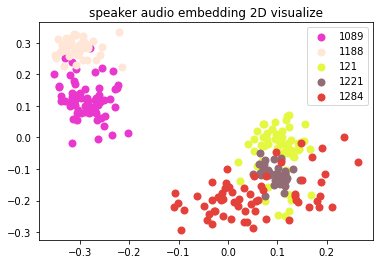

In [17]:
plot(utter_embeds_pca2d, speakers, trim_plot=5)

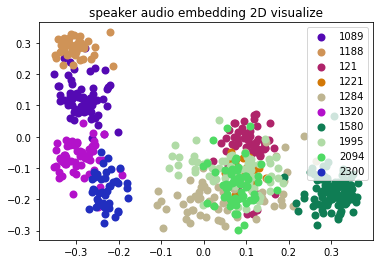

In [18]:
plot(utter_embeds_pca2d, speakers, trim_plot=10)

In [20]:
from sklearn.manifold import TSNE

def dimension_reduce_TSNE(embeds):
    tsne2d = TSNE(n_components=2)
    embeds_2d = tsne2d.fit_transform(embeds)
    return embeds_2d

utter_embeds_tsne2d = dimension_reduce_TSNE(utterance_embeds)
print(utter_embeds_tsne2d.shape)

(2620, 2)


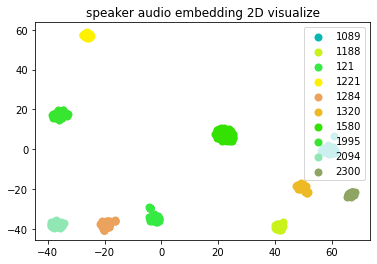

In [21]:
plot(utter_embeds_tsne2d, speakers, trim_plot=10)

In [22]:
from umap import UMAP

In [23]:
def dimension_reduce_UMAP(embeds):
    umap2d = UMAP(min_dist=1)
    embeds_2d = umap2d.fit_transform(embeds)
    return embeds_2d

utter_embeds_umap2d = dimension_reduce_UMAP(utterance_embeds)
print(utter_embeds_umap2d.shape)

(2620, 2)


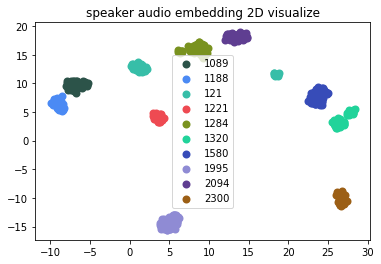

In [24]:
plot(utter_embeds_umap2d, speakers, trim_plot=10)